## Juypter notebook for data analysis of Book Bans Data 

In [2]:
# load in the data from excel and format it to the state data correctly 
import pandas as pd


dataframe_bantable = pd.read_csv('BOOK_BANS_TABLE.csv')



In [5]:

# following the form of the sensus name doc so we can do a spacial join in excel once this csv is exported
# formate is: County_name County, Full_state_name # caps included 

states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MP': 'Northern Mariana Islands',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
}


# dataframe_bantable['State'] = dataframe_bantable['State'].replace(states)
dataframe_bantable['State'] = dataframe_bantable['State'].str.strip().replace(states)

    
#then create the full name by doing a lambda with state and county resolution 

In [58]:
# now join into a new column in the frame the county state info 
from numpy import NaN


print(len(dataframe_bantable))

dataframe_bantable['County']


13567
0


0          Indian River
1                   NaN
2                   NaN
3                  Clay
4        Daviess County
              ...      
13562               NaN
13563               NaN
13564               NaN
13565               NaN
13566              Clay
Name: County, Length: 13567, dtype: object

Since we have found out that County information has been excluded for some 
of the Entries we have chosen to just have a dataframe where county information
is present IE. to ignore all NAN values for this such case. We save this to 
a new field in the df called **'County_State'.**

In [15]:
import math

def combine_columns(row):
    if type(row['County']) == float: 
        if type(row['City']) == float: 
            return str(row['State'])
        return str(row['City'] + " City" ", " + str(row['State']))
    
    return str(row['County']) + ", " + str(row['State'])

dataframe_bantable['County_State'] = dataframe_bantable.apply(combine_columns, axis=1)

pd.set_option('display.max_columns', None)

dataframe_bantable



,ID,New_Book_Author,New_Book_Title,Series_Name,Book_Co_Author,Illustrators,Challenge_Type,Initial_Response,Challenge_Notes,Decision,Restrictions,Restriction_Details,Library_Type,Month,Year,State,Overseeing_Agency,City,County,Sch_Name,Lib_name,Police,Book_Status,Data_Entry_Date,Links1,Links2,Links3,Links4,Last_Updated,Challenge_Init,County_State
0,10,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,NaN,NaN,NaN,Unclear,Off Shelves,Status Change: 2/28/22,Unknown,NaN,NaN,School,November,2021.0,Florida,Indian River County Schools,NaN,Indian River,NaN,NaN,Unknown,RETURNED - FL as 5/2022,NaN,NaN,NaN,NaN,NaN,NaN,Affiliation Unknown,"Indian River, Florida"
1,11,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,NaN,NaN,NaN,Unclear,Off Shelves,NaN,Unknown,NaN,NaN,School,12,2021.0,Texas,North East,NaN,NaN,NaN,NaN,Unknown,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,NaN,NaN,Administration,Texas
2,9120,"Gagnon, Jilly",#famous,NaN,NaN,NaN,Internal/Administrative Review,Off Shelves,A comprehensive analysis by DesMoines Register...,Still in Process,NaN,NaN,School,10,2023.0,Iowa,Nevada Community School District,Nevada,NaN,NaN,NaN,NaN,NaN,10/27/2023,https://www.desmoinesregister.com/story/news/e...,NaN,NaN,NaN,NaN,Administration,"Nevada City, Iowa"
3,8573,"Ukazu, Ngozi",#Hockey,"Check, Please!",NaN,NaN,Formal,Off Shelves,Clay County Schools keeps an online database o...,Banned/Removed,NaN,NaN,School,SY,2223.0,Florida,Clay County District Schools,NaN,Clay,NaN,NaN,NaN,NaN,10/25/2023,https://docs.google.com/spreadsheets/d/1iP1nVO...,NaN,NaN,NaN,NaN,Affiliation Unknown,"Clay, Florida"
4,8022,"Ukazu, Ngozi",#Hockey,"Check, Please!",NaN,NaN,Formal,Off Shelves,"the Daviess County Citizens for Decency, recen...",Still in Process,NaN,NaN,Public,08,2023.0,Kentucky,Daviess County Public Library,Owensboro,Daviess County,NaN,Daviess County Public Library,NaN,NaN,09/24/2023,https://www.apg-wi.com/townnews/museums/group-...,NaN,NaN,NaN,NaN,Group,"Daviess County, Kentucky"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,9322,"Bunker, Lisa",Zenobia July,NaN,NaN,NaN,Internal/Administrative Review,Off Shelves,A comprehensive analysis by DesMoines Register...,Still in Process,NaN,NaN,School,10,2023.0,Iowa,Norwalk Community School District,Norwalk,NaN,NaN,NaN,NaN,NaN,10/27/2023,https://www.desmoinesregister.com/story/news/e...,NaN,NaN,NaN,NaN,Administration,"Norwalk City, Iowa"
13563,7321,"Bunker, Lisa",Zenobia July,NaN,NaN,NaN,Formal,On shelves,Complaint Filed - status unclear,Unknown,NaN,NaN,School,January,2022.0,Texas,Prosper ISD,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Group,Texas
13564,7322,"Brandon, James","Ziggy, Stardust & me",NaN,NaN,NaN,Internal/Administrative Review,Off Shelves,Removed from shelves for review on basis of Re...,Unknown,NaN,NaN,School,December,2021.0,Texas,North East,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administration,Texas
13565,7323,"Rooney, Anne",Zombies on the Loose,NaN,NaN,NaN,Formal,Unknown,Elementary,Retained,NaN,NaN,School,03,2022.0,Texas,Eanes,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Affiliation Unknown,Texas


In [7]:
dataframe_bantable['County_State'] = dataframe_bantable['County_State'].str.strip()
dataframe_bantable.to_csv("book_bans_cleaned_1.csv")

## Now that we have a cleaned version of the ban we want to join to the us census data. 

1. We are going to do this here by pulling both and joining the csv's, to get 
   a csv that stores our ban data and census demographic data
2. Then after that we will go into GIS and and do our spacial join with our
   shape file using the GEOID field.

In [8]:
# geographic area name matching to county, State resolution 

census_df = pd.read_csv('census_demographic_data.csv')
census_df.columns

Index(['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'DP05_0002E',
       'DP05_0002M', 'DP05_0003E', 'DP05_0003M', 'DP05_0004E', 'DP05_0004M',
       ...
       'DP05_0087PE', 'DP05_0087PM', 'DP05_0088PE', 'DP05_0088PM',
       'DP05_0089PE', 'DP05_0089PM', 'DP05_0090PE', 'DP05_0090PM',
       'DP05_0091PE', 'DP05_0091PM'],
      dtype='object', length=366)

Filtering for, County State and nonnull GEOID returns us
with a MUCH smaller dataset of 302 bans. 

We will export it as: 'county_bans_census.csv'

In [45]:
# now trying string simularity to county data 
# dataframe_bantable['County_State']
dataframe_bantable['County_State'].str.contains(',').sum()


8535

Now more analysis of the spacial data for resolution 

1422


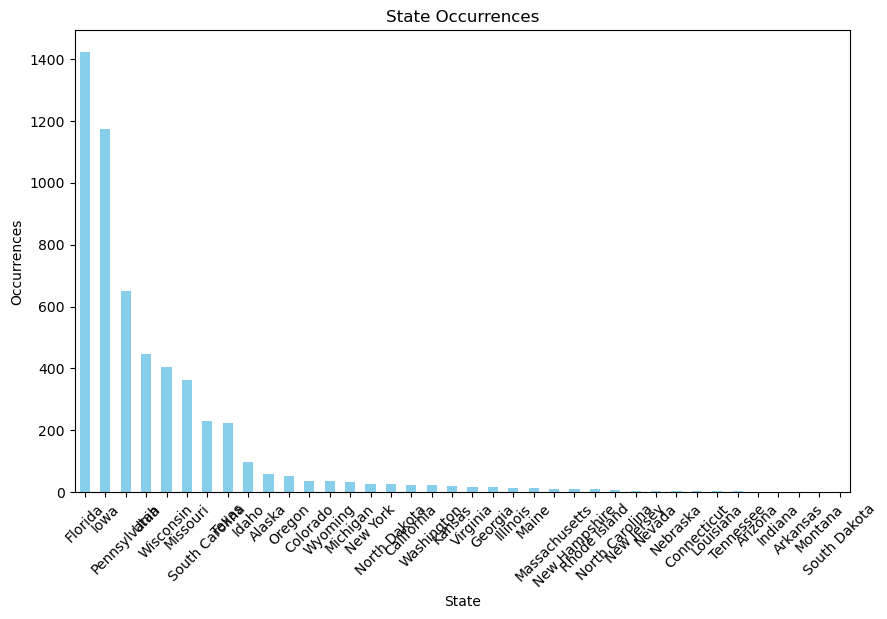

In [44]:

import matplotlib.pyplot as plt

district_filter = dataframe_bantable['Overseeing_Agency'].str.contains('District')

district_frame = dataframe_bantable[district_filter]

district_frame

# Count occurrences of each state
state_counts = district_frame['State'].value_counts()
# Find state with the highest count
max_count_state = state_counts.idxmax()
max_count = state_counts.max()
print(max_count)


# Plotting
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('State Occurrences')
plt.xlabel('State')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()


### BINGO LETS USE FLORIDA!!!!!

In [53]:
# distrobution of school districts and states 

district_filter = dataframe_bantable['Overseeing_Agency'].str.contains('District')

district_frame = dataframe_bantable[district_filter]

district_frame[]



ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [22]:
census_df['NAME']

0                      Geographic Area Name
1                             United States
2                   Baldwin County, Alabama
3                   Calhoun County, Alabama
4                   Cullman County, Alabama
                       ...                 
845            Ponce Municipio, Puerto Rico
846         San Juan Municipio, Puerto Rico
847         Toa Alta Municipio, Puerto Rico
848         Toa Baja Municipio, Puerto Rico
849    Trujillo Alto Municipio, Puerto Rico
Name: NAME, Length: 850, dtype: object

In [77]:
# new_df = dataframe_bantable.set_index('County_State').join(census_df.set_index('NAME'))

merged_df = dataframe_bantable.merge(census_df, how='left', left_on='County_State', right_on='NAME')

filtered_df = merged_df[merged_df['GEO_ID'].notna()]

filtered_df

,ID,New_Book_Author,New_Book_Title,Series_Name,Book_Co_Author,Illustrators,Challenge_Type,Initial_Response,Challenge_Notes,Decision,Restrictions,Restriction_Details,Library_Type,Month,Year,State,Overseeing_Agency,City,County,Sch_Name,Lib_name,Police,Book_Status,Data_Entry_Date,Links1,Links2,Links3,Links4,Last_Updated,Challenge_Init,County_State,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,DP05_0005E,DP05_0005M,DP05_0006E,DP05_0006M,DP05_0007E,DP05_0007M,DP05_0008E,DP05_0008M,DP05_0009E,DP05_0009M,DP05_0010E,DP05_0010M,DP05_0011E,DP05_0011M,DP05_0012E,DP05_0012M,DP05_0013E,DP05_0013M,DP05_0014E,DP05_0014M,DP05_0015E,DP05_0015M,DP05_0016E,DP05_0016M,DP05_0017E,DP05_0017M,DP05_0018E,DP05_0018M,DP05_0019E,DP05_0019M,DP05_0020E,DP05_0020M,DP05_0021E,DP05_0021M,DP05_0022E,DP05_0022M,DP05_0023E,DP05_0023M,DP05_0024E,DP05_0024M,DP05_0025E,DP05_0025M,DP05_0026E,DP05_0026M,DP05_0027E,DP05_0027M,DP05_0028E,DP05_0028M,DP05_0029E,DP05_0029M,DP05_0030E,DP05_0030M,DP05_0031E,DP05_0031M,DP05_0032E,DP05_0032M,DP05_0033E,DP05_0033M,DP05_0034E,DP05_0034M,DP05_0035E,DP05_0035M,DP05_0036E,DP05_0036M,DP05_0037E,DP05_0037M,DP05_0038E,DP05_0038M,DP05_0039E,DP05_0039M,DP05_0040E,DP05_0040M,DP05_0041E,DP05_0041M,DP05_0042E,DP05_0042M,DP05_0043E,DP05_0043M,DP05_0044E,DP05_0044M,DP05_0045E,DP05_0045M,DP05_0046E,DP05_0046M,DP05_0047E,DP05_0047M,DP05_0048E,DP05_0048M,DP05_0049E,DP05_0049M,DP05_0050E,DP05_0050M,DP05_0051E,DP05_0051M,DP05_0052E,DP05_0052M,DP05_0053E,DP05_0053M,DP05_0054E,DP05_0054M,DP05_0055E,DP05_0055M,DP05_0056E,DP05_0056M,DP05_0057E,DP05_0057M,DP05_0058E,DP05_0058M,DP05_0059E,DP05_0059M,DP05_0060E,DP05_0060M,DP05_0061E,DP05_0061M,DP05_0062E,DP05_0062M,DP05_0063E,DP05_0063M,DP05_0064E,DP05_0064M,DP05_0065E,DP05_0065M,DP05_0066E,DP05_0066M,DP05_0067E,DP05_0067M,DP05_0068E,DP05_0068M,DP05_0069E,DP05_0069M,DP05_0070E,DP05_0070M,DP05_0071E,DP05_0071M,DP05_0072E,DP05_0072M,DP05_0073E,DP05_0073M,DP05_0074E,DP05_0074M,DP05_0075E,DP05_0075M,DP05_0076E,DP05_0076M,DP05_0077E,DP05_0077M,DP05_0078E,DP05_0078M,DP05_0079E,DP05_0079M,DP05_0080E,DP05_0080M,DP05_0081E,DP05_0081M,DP05_0082E,DP05_0082M,DP05_0083E,DP05_0083M,DP05_0084E,DP05_0084M,DP05_0085E,DP05_0085M,DP05_0086E,DP05_0086M,DP05_0087E,DP05_0087M,DP05_0088E,DP05_0088M,DP05_0089E,DP05_0089M,DP05_0090E,DP05_0090M,DP05_0091E,DP05_0091M,DP05_0001PE,DP05_0001PM,DP05_0002PE,DP05_0002PM,DP05_0003PE,DP05_0003PM,DP05_0004PE,DP05_0004PM,DP05_0005PE,DP05_0005PM,DP05_0006PE,DP05_0006PM,DP05_0007PE,DP05_0007PM,DP05_0008PE,DP05_0008PM,DP05_0009PE,DP05_0009PM,DP05_0010PE,DP05_0010PM,DP05_0011PE,DP05_0011PM,DP05_0012PE,DP05_0012PM,DP05_0013PE,DP05_0013PM,DP05_0014PE,DP05_0014PM,DP05_0015PE,DP05_0015PM,DP05_0016PE,DP05_0016PM,DP05_0017PE,DP05_0017PM,DP05_0018PE,DP05_0018PM,DP05_0019PE,DP05_0019PM,DP05_0020PE,DP05_0020PM,DP05_0021PE,DP05_0021PM,DP05_0022PE,DP05_0022PM,DP05_0023PE,DP05_0023PM,DP05_0024PE,DP05_0024PM,DP05_0025PE,DP05_0025PM,DP05_0026PE,DP05_0026PM,DP05_0027PE,DP05_0027PM,DP05_0028PE,DP05_0028PM,DP05_0029PE,DP05_0029PM,DP05_0030PE,DP05_0030PM,DP05_0031PE,DP05_0031PM,DP05_0032PE,DP05_0032PM,DP05_0033PE,DP05_0033PM,DP05_0034PE,DP05_0034PM,DP05_0035PE,DP05_0035PM,DP05_0036PE,DP05_0036PM,DP05_0037PE,DP05_0037PM,DP05_0038PE,DP05_0038PM,DP05_0039PE,DP05_0039PM,DP05_0040PE,DP05_0040PM,DP05_0041PE,DP05_0041PM,DP05_0042PE,DP05_0042PM,DP05_0043PE,DP05_0043PM,DP05_0044PE,DP05_0044PM,DP05_0045PE,DP05_0045PM,DP05_0046PE,DP05_0046PM,DP05_0047PE,DP05_0047PM,DP05_0048PE,DP05_0048PM,DP05_0049PE,DP05_0049PM,DP05_0050PE,DP05_0050PM,DP05_0051PE,DP05_0051PM,DP05_0052PE,DP05_0052PM,DP05_0053PE,DP05_0053PM,DP05_0054PE,DP05_0054PM,DP05_0055PE,DP05_0055PM,DP05_0056PE,DP05_0056PM,DP05_0057PE,DP05_0057PM,DP05_0058PE,DP05_0058PM,DP05_0059PE,DP05_0059PM,DP05_0060PE,DP05_0060PM,DP05_0061PE,DP05_0061PM,DP05_0062PE,DP05_0062PM,DP05_0063PE,DP05_0063PM,DP05_0064PE,DP05_0064PM,DP05_0065PE,DP05_0065PM,DP05_0066PE,DP05_0066PM,DP05_0067PE,DP05_0067PM,DP05_0068PE,DP05_0068PM,DP05_00

In [78]:
census_df.to_csv('county_bans_census.csv')

Now we need to rock through the Overseeing agency and resolve it to the district name 



In [55]:
dataframe_bantable['Overseeing_Agency']



0              Indian River County Schools
1                               North East
2         Nevada Community School District
3             Clay County District Schools
4            Daviess County Public Library
                       ...                
13562    Norwalk Community School District
13563                          Prosper ISD
13564                           North East
13565                                Eanes
13566         Clay County District Schools
Name: Overseeing_Agency, Length: 13567, dtype: object

In [ ]:
import math

def rename_to_district(row):
    agency = str(row['Overseeing_Agency'])
    if agency.str.contains('District Schools'): 
        
        return 

dataframe_bantable['District_Access'] = dataframe_bantable.apply(rename_to_district, axis=1)

pd.set_option('display.max_columns', None)

dataframe_bantable
